In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading input data csv file
data=pd.read_csv('C:\\Users\\anto2378\\Downloads\\Uber Request Data.csv')
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
#checking the number of duplicate values
data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [4]:
#check for any duplicate column
sum(data.duplicated(subset = 'Request id'))

0

In [5]:
#Finding number of cancelled trips
(data['Status'] == 'Cancelled' ).sum()

1264

In [6]:
#Finding number of trips where no cars were available
(data['Status'] == 'No Cars Available' ).sum()

2650

In [7]:
#Check whether the drop timestamp nil values with demand supply gap and check for any missing or redundant values
(data['Status'] == 'Cancelled' ).sum()+(data['Status'] == 'No Cars Available' ).sum()

3914

In [8]:
#Formatting date time stamp
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], dayfirst=True)
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'], dayfirst=True)

In [9]:
#Extracted hour information from date timestamp
data['Request hour'] = data['Request timestamp'].dt.hour
data['Drop hour'] = data['Drop timestamp'].dt.hour

In [10]:
#creating new boolean columns for Demand and supply comparison
data['Demand']=1
data['Supply']= np.where(data['Status']=='Trip Completed', 1, 0)

In [22]:
#checking for prevoius steps
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Drop hour,Demand,Supply,Hour Segment
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,1,1,Daytime
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,1,1,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,1,1,Daytime
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,1,1,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,1,1,Daytime


In [12]:
# creating segments for different time slots of day
def segment_hours(x):
    'divide the time of the day into four categories'
    if (x < 6) :
        return "Early Morning"
    elif 6 <= x < 16:
        return "Daytime"
    elif 16 <= x <= 20:
        return "Evening"
    elif x > 20:
        return "Late Evening"
    else:
        return "-"

data['Hour Segment'] = data['Request hour'].apply(lambda x: segment_hours(x))
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Drop hour,Demand,Supply,Hour Segment
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,1,1,Daytime
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,1,1,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,1,1,Daytime
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,1,1,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,1,1,Daytime


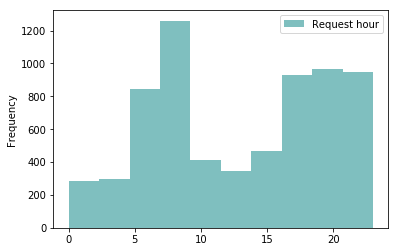

In [23]:
#Overall Demand Distribution
data[['Request hour']].plot(kind='hist', color=('teal'),alpha=0.5, label=("Demand"))

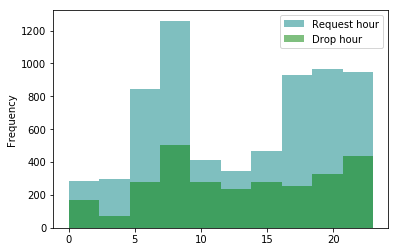

In [14]:
#Demand, Supply and Demand Supply Gap
data[['Request hour','Drop hour']].plot(kind='hist', color=('teal','g'),alpha=0.5, label=("Demand", "Demand Supply Gap"))

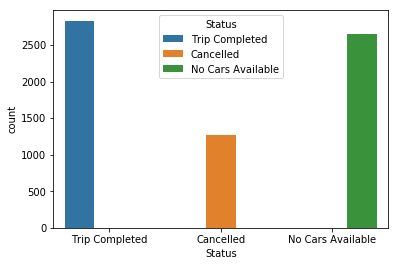

In [15]:
#Plot to compare Trip completed, cancelled and non availability of cars
sns.countplot(x = 'Status', hue = 'Status', data = data)

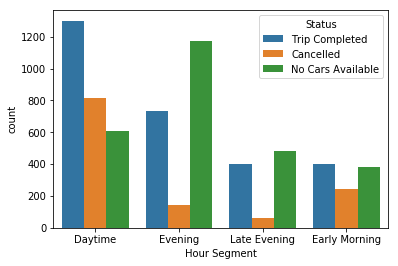

In [16]:
#Plot after segmentation of hours to compare Trip completed, cancelled and non availability of cars
sns.countplot(x = 'Hour Segment', hue = 'Status', data = data)

In [17]:
#function for plotting based on input, segmented hours
def plotting(hour_segment):
    morning = data[data['Hour Segment'] == hour_segment]
    sns.countplot(x = "Pickup point", hue = "Status", data = morning)


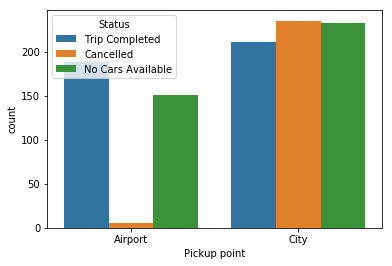

In [18]:
#invoking function for segment 1
plotting("Early Morning")

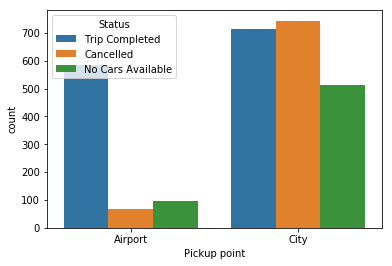

In [19]:
#invoking function for segment 2
plotting("Daytime")

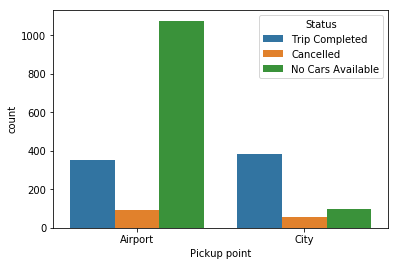

In [20]:
#invoking function for segment 3
plotting("Evening")

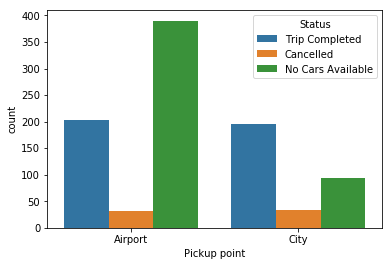

In [21]:
#invoking function for segment 4
plotting("Late Evening")